# Get started with 3D array
First load all important modules.

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
from cmcrameri import cm

Import all package modules.

In [2]:
# Add the path to the system path
sys.path.append('/Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/CODING_WORLD/PYTHON_WORLD/Digital_Rock_Physics_Template')

import barbara.default_parameters as params
from barbara.image import save_figure2, plot_layer
import barbara.input_output as io
from barbara.default_params import update_parameters_file

Set the file path of your 3D array. For the example you can use a provided 2 phase binary.

In [3]:
file_path = 'pore_100_100_400.raw'

Each 3D.raw must be imported based on it's corresponding parameters like dimensions (nx, ny, nz) or type (uint8, uint16, uint32). The following data (uint8) is sorted in the shape of `data[nz, ny, nx]`. Due to dimensions rules (see README.md) all arrays must be in the format of `data[nx, ny, nz]`. The programm can handle the conversion on its own based on the provided order of dimensions. Regular as well as irregular data can be imported.

In [4]:
dimensions = {'nz': 400, 'ny': 100, 'nx': 100}
data = io.import_model(file_path, dtype='uint8', dimensions=dimensions)

Parameters filename: pore_100_100_400.json
Reshaping data to the desired order (nx, ny, nz)...
Dimensions: 3
nx: 100
ny: 100
nz: 400
---------------------------------------------------------------------------
pore_100_100_400.raw:                                                      
Ups, the minimum value in your data is 1. Automatic adjustments are needed.
---------------------------------------------------------------------------


In case a subvolume is needed, a corresponding `paramsfile` must be prepared which is always created while importing. 

In [5]:
subvolume = data[:, :, :100] # Create a subvolume
subvolume_params = {'dim': 3, 'nx': 100, 'ny': 100, 'nz': 100}
update_parameters_file(paramsfile='subvolume_100_100_100.json', **subvolume_params)

The binaries can also be enriched with labels like pore, matrix, etc.

In [6]:
labels = ['Pore', 'Matrix'] # Define labels

The corresponding plots in xy, yz, and xz plane.

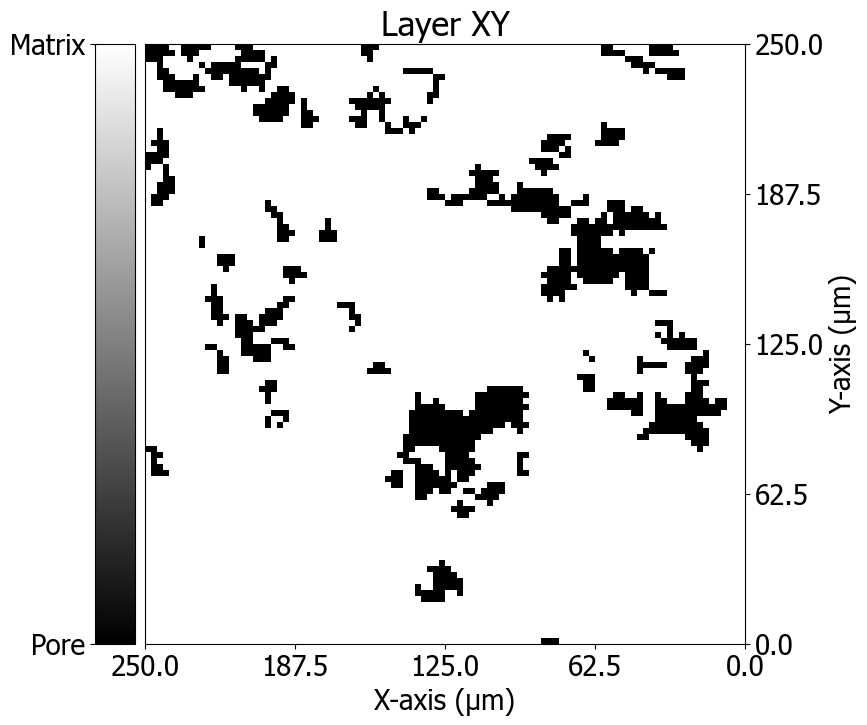

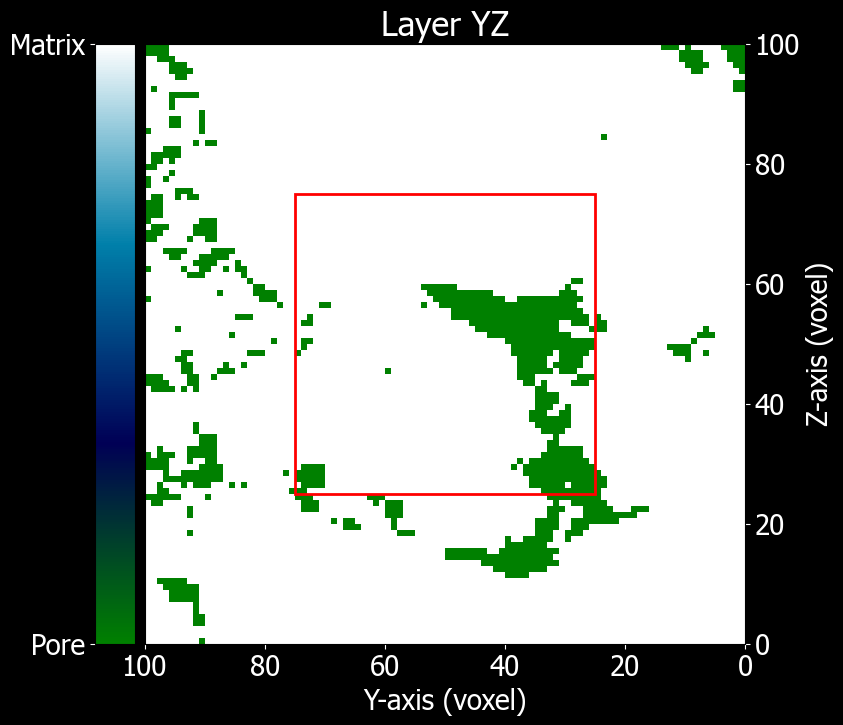

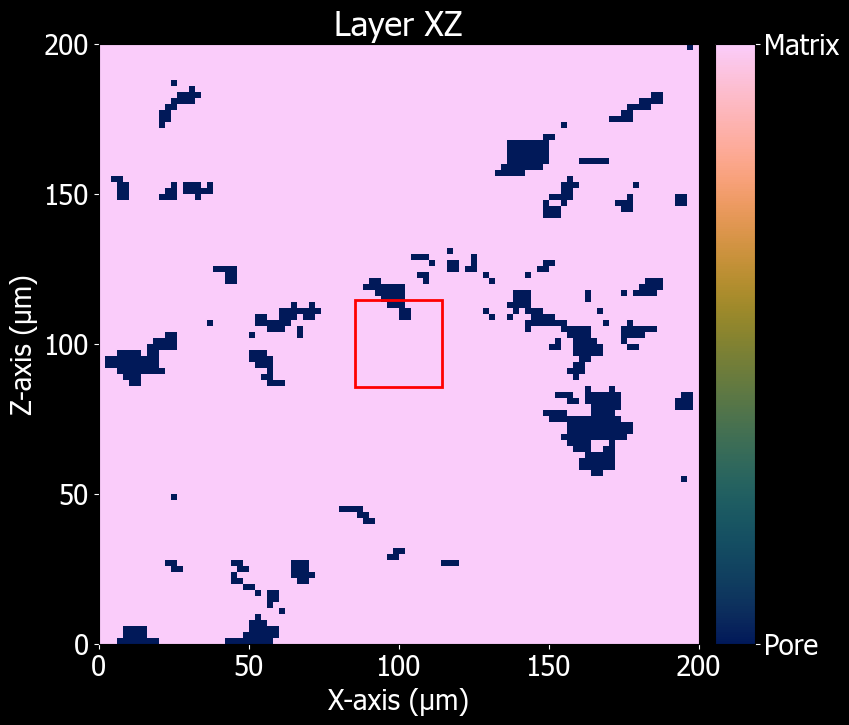

In [7]:
fig_xy, ax = plot_layer(subvolume, paramsfile='subvolume_100_100_100.json', cmap_set="gray", layer=None, plane='xy', subvolume=None, labels=labels, title="Layer XY", voxel_size=2.5, dark_mode=False)
fig_yz, ax = plot_layer(subvolume, paramsfile='subvolume_100_100_100.json', cmap_set="ocean", layer=None, plane='yz', subvolume=50, labels=labels, title="Layer YZ", voxel_size=None, dark_mode=True)
fig_xz, ax = plot_layer(subvolume, paramsfile='subvolume_100_100_100.json', cmap_set=None, layer=None, plane='xz', subvolume=14.5, labels=labels, title="Layer XZ", voxel_size=2, dark_mode=True)

Finally, the figures can be saved in high quality.

In [8]:
save_figure2(fig_xy, filename='subvolume_plane_xy')
save_figure2(fig_yz, filename='subvolume_plane_yz')
save_figure2(fig_xz, filename='subvolume_plane_xz')

Figure saved at: /Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/CODING_WORLD/PYTHON_WORLD/Digital_Rock_Physics_Template/examples/subvolume_plane_xy.png
Figure saved at: /Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/CODING_WORLD/PYTHON_WORLD/Digital_Rock_Physics_Template/examples/subvolume_plane_yz.png
Figure saved at: /Users/martin/Library/Mobile Documents/com~apple~CloudDocs/MYDATA/CODING_WORLD/PYTHON_WORLD/Digital_Rock_Physics_Template/examples/subvolume_plane_xz.png
